# Anomaly Detection

In [1]:
import pandas as pd 
import numpy as np

import data_describe as dd
from data_describe.anomaly.detection import anomaly_detection

In [2]:
# Generate timeseries adata
Fs = 100
f = 5
x = np.arange(100)
t = np.arange(np.datetime64('2017-01-01'), np.datetime64('2017-04-11'))
y = np.sin(2 * np.pi * f * x / Fs)

# Add anomalous data
y[70] = 5
y[60] = 2
y[80] = 1.1

In [3]:
data = {'Time': t, 'Voltage':y}
df = pd.DataFrame(data)
df.head(2)

,Time,Voltage
0,2017-01-01,0.000000
1,2017-01-02,0.309017


### Plot Timeseries

<AxesSubplot:ylabel='Voltage'>

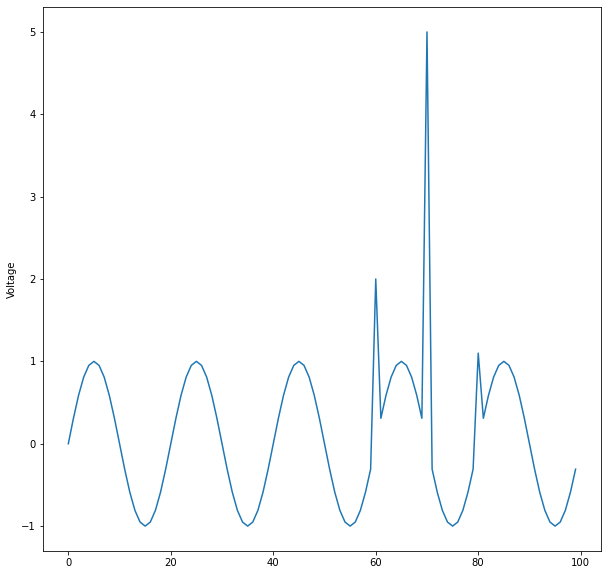

In [4]:
dd.plot_time_series(df, col="Voltage")

### Perform Anomaly Detection using ARIMA
* anomaly_detection uses ARIMA by default if date_col and target is specified
* Anomalies are identified by setting a threshold (sigma) based on the rolling standard deviation of the residuals

In [5]:
# Define arguments for default ARIMA model
auto_arima_args = {
    "start_p": 1,
    "start_q": 1,
    "max_p": 1,
    "max_q": 1,
    "m": 1,
    "start_P": 0,
    "seasonal": True,
    "d": 1,
    "D": 1,
    "trace": True,
    "error_action": "ignore",
    "suppress_warnings": True,
    "stepwise": True,
}

In [6]:
# Use default auto_arima model 
widget = anomaly_detection(df, estimator=None, target='Voltage', date_col='Time', n_periods=6, time_split_index=20, sigma=2, **auto_arima_args)

Fitting ARIMA model:   0%|          | 0/80 [00:00<?, ?it/s]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-0.489, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-38.337, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec


Fitting ARIMA model:   1%|▏         | 1/80 [00:00<01:07,  1.17it/s]

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2.381, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-39.387, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.356 seconds


Fitting ARIMA model: 100%|██████████| 80/80 [00:02<00:00, 29.27it/s]


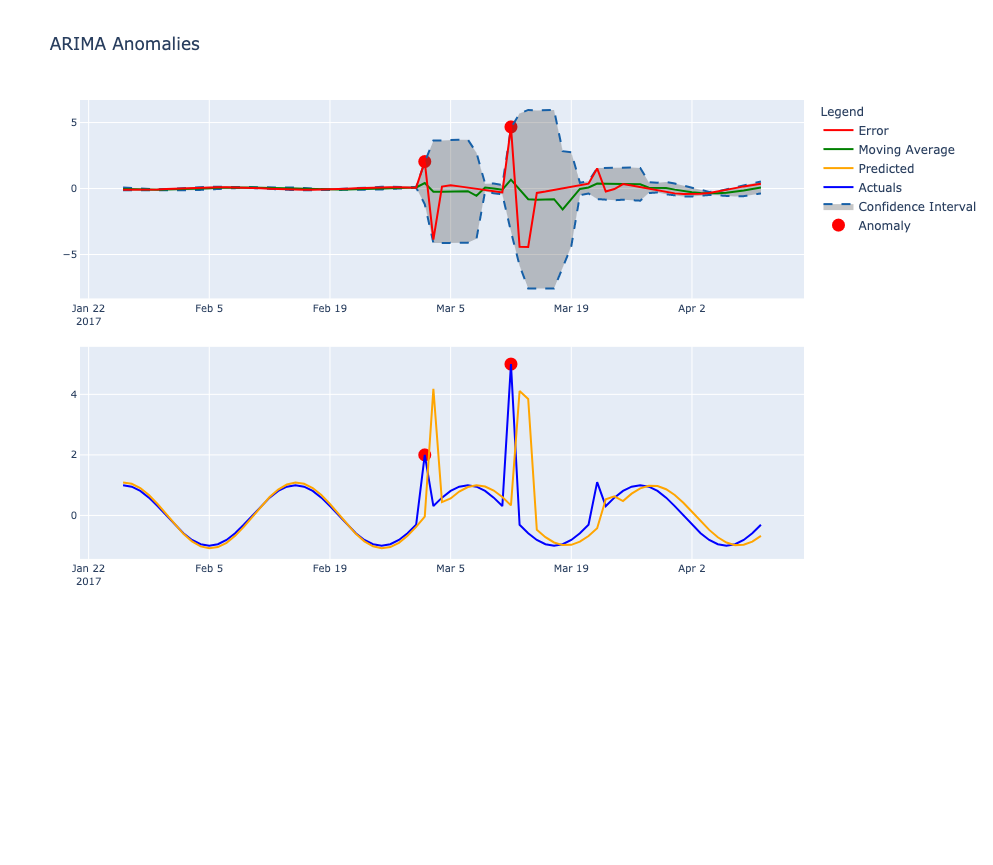

In [7]:
widget.show(viz_backend='plotly' ) 

## Auto fitting models
* It may be beneficial to run multiple anomaly detection models to see what is anomalous
* Set `estimator="auto"` to run through the 4 available models
    - Models: isolation forest, local outlier factor, elliptic envelope, and ARIMA

In [8]:
widget = anomaly_detection(df, estimator='auto', date_col='Time',target="Voltage", time_split_index=20, 
                           contamination=.1, n_periods=6, **auto_arima_args)

Fitting ARIMA model:   0%|          | 0/80 [00:00<?, ?it/s]

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-0.489, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-38.337, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec



Fitting ARIMA model:   1%|▏         | 1/80 [00:00<00:30,  2.56it/s]

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2.381, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-39.387, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.352 seconds



Fitting models: 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]


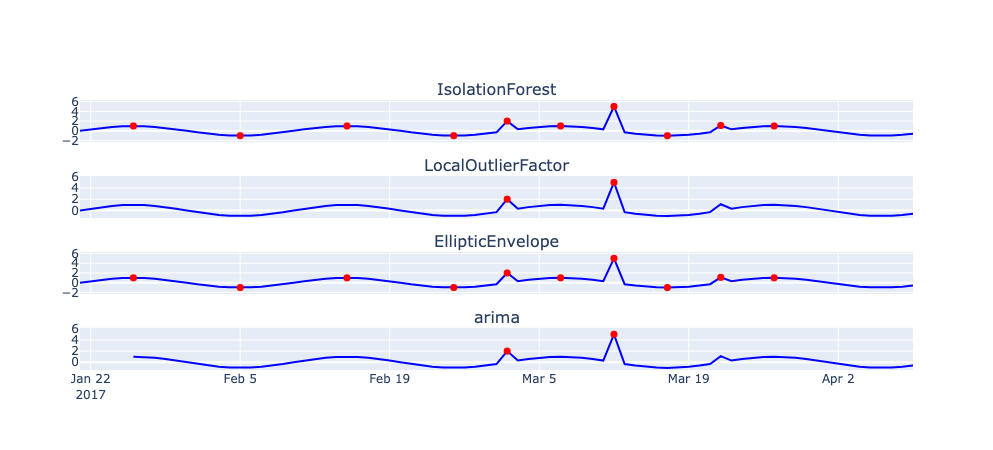

In [9]:
widget.show(viz_backend='plotly')